# Lógica Fuzzy com Python: O guia para Iniciantes: Exemplo das gorjetas

### Antecedentes (entradas)

Serviço: que nota você daria para o serviço, emuma escala de 1 a 10?

    - ruim, aceitável, ótimo
    
Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?

    - ruim, boa, saborosa
    
### Consequentes (saídas)

Gorjeta: quanta gorgeta você daria entre 0% e 20%?

    - baixa, média, alta
    
Regras
    
    - Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa
    - Se o serviço for médio então a gorjeta será média
    - Se o serviço for bom e a qualidade da comida for saborosa então a gorjeta será alta

## Instalação e importação das bibliotecas

    - Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib

## Antecedentes e consequentes

In [3]:
qualidade = ctrl.Antecedent(np.arange(0,11,1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0,11,1),'servico')

In [4]:
qualidade

Antecedent: qualidade

In [5]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
gorjeta = ctrl.Consequent(np.arange(0,21,1), 'gorjeta')

In [7]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [8]:
qualidade.automf(number=3, names = ['ruim','boa','saborosa'])
servico.automf(number=3, names = ['ruim','aceitável','ótimo'])

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


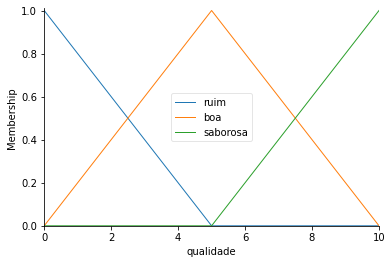

In [9]:
qualidade.view();

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


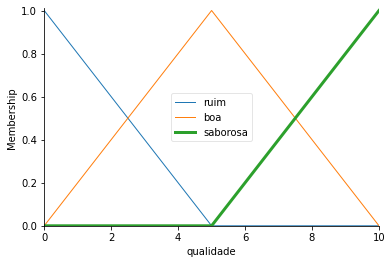

In [10]:
qualidade['saborosa'].view()

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


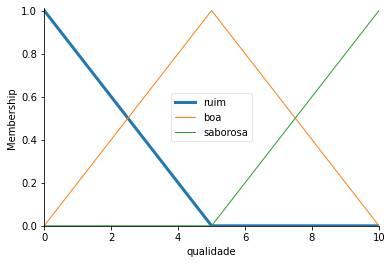

In [11]:
qualidade['ruim'].view()

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


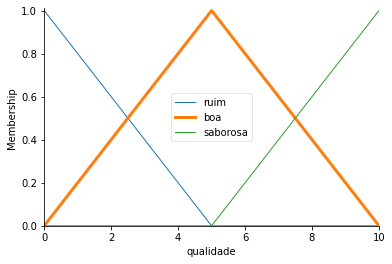

In [12]:
qualidade['boa'].view()

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


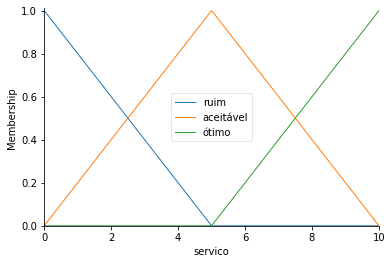

In [13]:
servico.view()

In [14]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [15]:
# função triangular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe,[0,0,10])

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


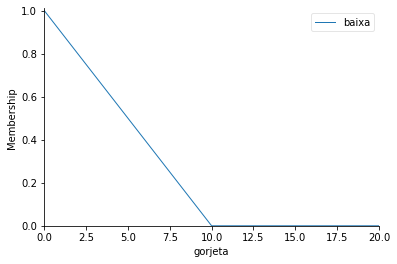

In [16]:
gorjeta.view()

In [17]:
gorjeta['média'] = fuzz.trimf(gorjeta.universe,[0,10,20])

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


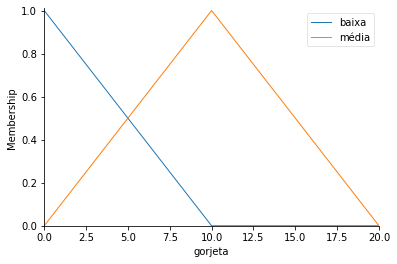

In [18]:
gorjeta.view()

In [19]:
gorjeta['alta'] = fuzz.trimf(gorjeta.universe,[10,20,20])

C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


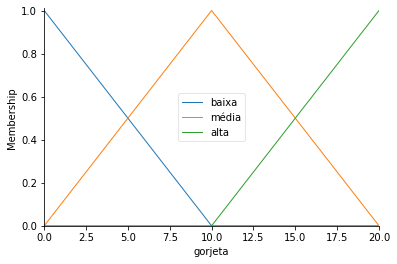

In [20]:
gorjeta.view()

In [21]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
regra3 = ctrl.Rule(qualidade['saborosa'] | servico['ótimo'], gorjeta['alta'])

## Sistema de controle

In [22]:
sistema_controle = ctrl.ControlSystem([regra1,regra2,regra3])

In [23]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [24]:
sistema.input['qualidade'] = 6.5
sistema.input['servico'] = 7.5
sistema.compute()

11.19047619047619


C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


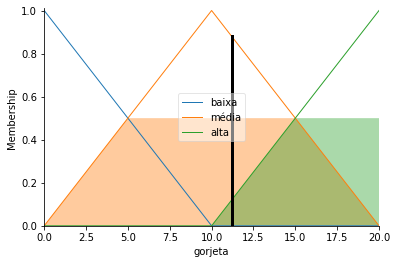

In [25]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

## Outras funções

In [1]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['média'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe,10,20,20,21)
gorjeta.view();

NameError: name 'fuzz' is not defined

In [27]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
regra3 = ctrl.Rule(qualidade['saborosa'] | servico['ótimo'], gorjeta['alta'])

In [28]:
sistema_controle = ctrl.ControlSystem([regra1,regra2,regra3])

In [29]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [30]:
sistema.input['qualidade'] = 6.5
sistema.input['servico'] = 7.5
sistema.compute()

12.239756463508852


C:\Users\clist\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


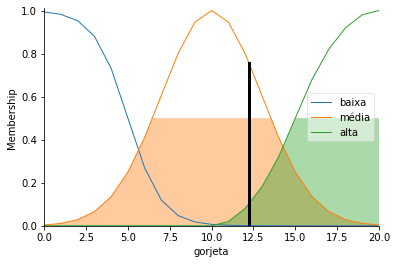

In [51]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)

# HARD FUZZY

## Instalação e importação das bibliotecas

    - Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [45]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Antecedentes e consequentes

In [46]:
x_comida = np.arange(0,11,1)
x_servico = np.arange(0,11,1)
x_gorjeta = np.arange(0,21,1)

In [47]:
x_comida, x_servico, x_gorjeta

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

### Qualidade da comida

In [48]:
y_comida_ruim = fuzz.trimf(x_comida, [0,0,5])
y_comida_boa = fuzz.trimf(x_comida, [0, 5, 10])
y_comida_saborosa = fuzz.trimf(x_comida, [5,10,10])

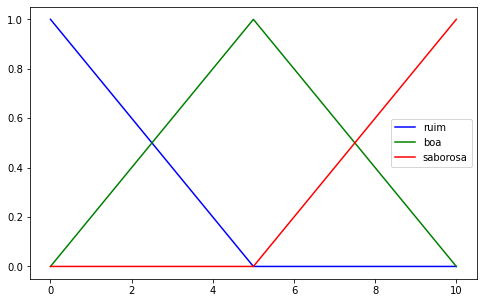

In [50]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_comida, y_comida_ruim, 'b', label='ruim')
ax.plot(x_comida, y_comida_boa, 'g', label='boa')
ax.plot(x_comida, y_comida_saborosa, 'r', label='saborosa')
ax.legend();

### Qualidade do serviço

In [53]:
y_servico_ruim = fuzz.trimf(x_servico, [0,0,5])
y_servico_aceitavel = fuzz.trimf(x_servico, [0,5,10])
y_servico_otimo = fuzz.trimf(x_servico, [5,10,10])

In [54]:
y_servico_ruim, y_servico_aceitavel, y_servico_otimo

(array([1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

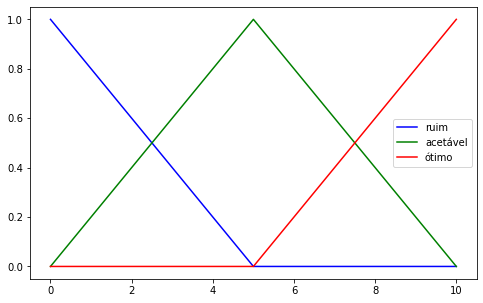

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_servico, y_servico_ruim, 'b', label='ruim')
ax.plot(x_servico, y_servico_aceitavel, 'g', label='acetável')
ax.plot(x_servico, y_servico_otimo, 'r', label='ótimo')
ax.legend();

### Gorjeta

In [57]:
y_gorjeta_baixa = fuzz.trimf(x_gorjeta, [0,0,10])
y_gorjeta_media = fuzz.trimf(x_gorjeta, [0,10,20])
y_gorjeta_alta = fuzz.trimf(x_gorjeta, [10,20,20])

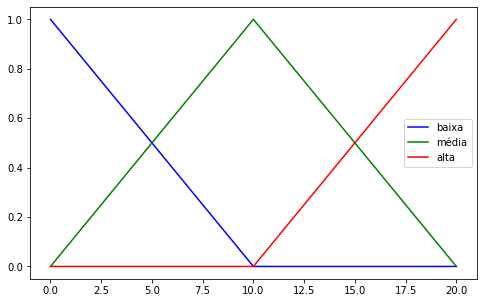

In [58]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_gorjeta, y_gorjeta_baixa, 'b', label='baixa')
ax.plot(x_gorjeta, y_gorjeta_media, 'g', label='média')
ax.plot(x_gorjeta, y_gorjeta_alta, 'r', label='alta')
ax.legend();

### Entradas (inputs)

In [67]:
comida_nivel_ruim = fuzz.interp_membership(x_comida, y_comida_ruim, 8.0)
comida_nivel_boa = fuzz.interp_membership(x_comida, y_comida_boa, 8.0)
comida_nivel_saborosa = fuzz.interp_membership(x_comida, y_comida_saborosa, 8.0)

In [69]:
 comida_nivel_ruim, comida_nivel_boa, comida_nivel_saborosa

(0.0, 0.4, 0.6)

In [70]:
servico_nivel_ruim = fuzz.interp_membership(x_servico, y_servico_ruim, 6.5)
servico_nivel_aceitavel = fuzz.interp_membership(x_servico, y_servico_aceitavel, 6.5)
servico_nivel_otimo = fuzz.interp_membership(x_servico, y_servico_otimo, 6.5)

In [71]:
servico_nivel_ruim, servico_nivel_aceitavel, servico_nivel_otimo

(0.0, 0.7, 0.30000000000000004)

### Regras

In [72]:
np.fmax(10,5)

10

In [73]:
np.fmin(10,5)

5

In [77]:
np.fmax(5, [3,4,5,6])

array([5, 5, 5, 6])

In [78]:
np.fmin(5, [3,4,5,6])

array([3, 4, 5, 5])

### Regra 1 

- Se a qualidade da comida for ruim ou o serviço for ruim então a gorjeta será baixa

In [79]:
comida_nivel_ruim, servico_nivel_ruim

(0.0, 0.0)

In [81]:
ativacao_regra1 = np.fmax(comida_nivel_ruim, servico_nivel_ruim)
ativacao_regra1

0.0

In [82]:
ativacao_gorjeta_baixa = np.fmin(ativacao_regra1, y_gorjeta_baixa)
ativacao_gorjeta_baixa

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Regra 2 

- Se o serviço for aceitável então a gorjeta será média

In [83]:
servico_nivel_aceitavel

0.7

In [84]:
y_gorjeta_media

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 0.9, 0.8,
       0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [86]:
ativacao_gorjeta_media = np.fmin(servico_nivel_aceitavel, y_gorjeta_media)
ativacao_gorjeta_media

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

### Regra 3 

- Se a qualidade da comida for saborosa ou o serviço for bom/ótimo então a gorjeta será alta

In [87]:
servico_nivel_otimo, comida_nivel_saborosa

(0.30000000000000004, 0.6)

In [88]:
ativacao_regra3 =np.fmax(servico_nivel_otimo, comida_nivel_saborosa)
ativacao_regra3

0.6

In [89]:
ativacao_gorjeta_alta = np.fmin(ativacao_regra3, y_gorjeta_alta)
ativacao_gorjeta_alta

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.2,
       0.3, 0.4, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6])

### Gráfico com as intersecções

In [90]:
x_gorjeta

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [91]:
x_gorjeta0 = np.zeros_like(x_gorjeta)
x_gorjeta0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
x_gorjeta.shape, x_gorjeta0.shape

((21,), (21,))

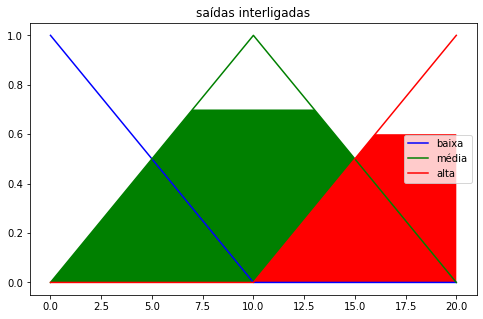

In [96]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_gorjeta, y_gorjeta_baixa, 'b', label='baixa')
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_baixa, facecolor='b')
ax.plot(x_gorjeta, y_gorjeta_media, 'g', label='média')
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_media, facecolor='g')
ax.plot(x_gorjeta, y_gorjeta_alta, 'r', label='alta')
ax.fill_between(x_gorjeta, x_gorjeta0, ativacao_gorjeta_alta, facecolor='r')
ax.set_title('saídas interligadas')
ax.legend();

### Defuzzificação

- centroid (centroid)
- bisector (bisector)
- mean of maximum (mom)
- mim of maximum (som)
- max of maximum (lom)

In [97]:
controle = np.fmax(ativacao_gorjeta_baixa, np.fmax(ativacao_gorjeta_media, ativacao_gorjeta_alta))
controle

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6])

In [98]:
gorjeta = fuzz.defuzz(x_gorjeta, controle, 'centroid')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'bisector')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'mom')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'som')
#gorjeta = fuzz.defuzz(x_gorjeta, controle, 'lom')
gorjeta

11.287037037037038

In [100]:
gorjeta_ativacao = fuzz.interp_membership(x_gorjeta, controle, gorjeta)

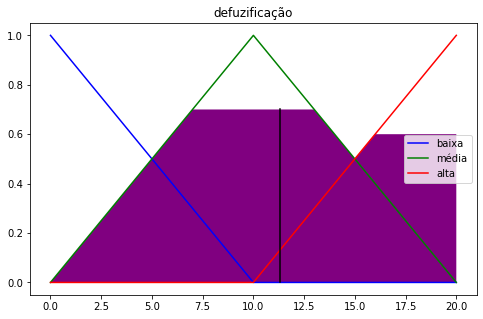

In [101]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_gorjeta, y_gorjeta_baixa, 'b', label='baixa')
ax.plot(x_gorjeta, y_gorjeta_media, 'g', label='média')
ax.plot(x_gorjeta, y_gorjeta_alta, 'r', label='alta')
ax.fill_between(x_gorjeta, x_gorjeta0, controle, facecolor='purple')
ax.plot([gorjeta, gorjeta], [0, gorjeta_ativacao], 'black')
ax.set_title('defuzificação')
ax.legend();